# Clip USDM 105 W

1.18.2023 a.stein,

Here I'm delving into upscaling this whole operation. We're gonna go to everything west of longitude 105!

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import xarray as xr
import rioxarray
import rasterio as rio
import pandas as pd
import geopandas as gpd

from tqdm.notebook import tqdm

import sys
sys.path.append('../../')
import ndrought.wrangle as wrangle

/pool0/data/steinjao/drought/drought_impact/notebooks/organize_data/../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dm_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures'

## USDM

In [3]:
usdm_conus = xr.open_dataset(f'{dm_path}/usdm/USDM_CONUS_20000104_20220412.nc')
usdm_conus

<xarray.Dataset>
Dimensions:  (lat: 1018, lon: 2342, date: 1163)
Coordinates:
  * lat      (lat) float64 49.62 49.6 49.57 49.55 ... 24.27 24.25 24.22 24.2
  * lon      (lon) float64 -125.1 -125.1 -125.1 -125.0 ... -66.63 -66.61 -66.58
  * date     (date) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-04-12
Data variables:
    USDM     (date, lat, lon) float64 ...
Attributes:
    compilation:  a. stein, 6/8/2022
    description:  weekly gridded United States Drought Monitor (USDM) from 1/...
    source:       https://www1.ncdc.noaa.gov/pub/data/nidis/geojson/us/usdm-t...
    crs:          EPSG:4326
    join:         lat, lon taken from 2000-01-04 file
    clipping:     original data was clipped to CONUS using http://eric.clst.o...

In [4]:
usdm_conus.sel(lon=slice(-105))

<xarray.Dataset>
Dimensions:  (lat: 1018, lon: 805, date: 1163)
Coordinates:
  * lat      (lat) float64 49.62 49.6 49.57 49.55 ... 24.27 24.25 24.22 24.2
  * lon      (lon) float64 -125.1 -125.1 -125.1 -125.0 ... -105.1 -105.0 -105.0
  * date     (date) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-04-12
Data variables:
    USDM     (date, lat, lon) float64 ...
Attributes:
    compilation:  a. stein, 6/8/2022
    description:  weekly gridded United States Drought Monitor (USDM) from 1/...
    source:       https://www1.ncdc.noaa.gov/pub/data/nidis/geojson/us/usdm-t...
    crs:          EPSG:4326
    join:         lat, lon taken from 2000-01-04 file
    clipping:     original data was clipped to CONUS using http://eric.clst.o...

... that's actually rather easy

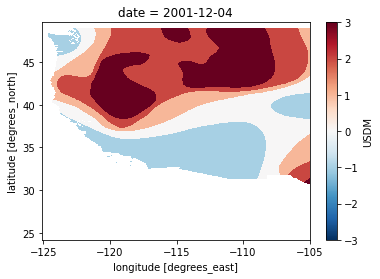

In [5]:
usdm_conus.sel(lon=slice(-105)).isel(date=100)['USDM'].plot()

In [6]:
usdm_105w = usdm_conus.sel(lon=slice(-105))

In [7]:
usdm_105w = usdm_105w.rename_dims({'date':'time'})
usdm_105w = usdm_105w.rename_vars({'date':'time'})

In [8]:
attrs = usdm_105w.attrs
attrs['clipping'] = f"{attrs['clipping']}. This selection has been clipped to everything west of longitude 105 degrees within CONUS." 
attrs['clipping']
usdm_105w.attrs = attrs

I think this is the projection I want to use: https://epsg.io/5070

In [9]:
usdm_105w_5070 = usdm_105w['USDM'].rio.write_crs('EPSG:4326').rio.reproject('EPSG:5070')

In [10]:
usdm_105w_5070

<xarray.DataArray 'USDM' (time: 1163, y: 1214, x: 897)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x            (x) float64 -2.955e+06 -2.952e+06 ... -6.62e+05 -6.595e+05
  * y            (y) float64 3.281e+06 3.279e+06 ... 1.764e+05 1.739e+05
  * time         (time) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-04-12
    spatial_ref  int64 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    GeoTransform:                 -125.12090760646159 0.025 0.0 49.6355481069...

In [11]:
usdm_105w_5070.attrs

{'crs_wkt': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]',
 'semi_major_axis': 6378137.0,
 'semi_minor_axis': 6356752.314245179,
 'inverse_flattening': 298.257223563,
 'reference_ellipsoid_name': 'WGS 84',
 'longitude_of_prime_meridian': 0.0,
 'prime_meridian_name': 'Greenwich',
 'geographic_crs_name': 'WGS 84',
 'grid_mapping_name': 'latitude_longitude',
 'spatial_ref': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]',
 'GeoTransform': '-125.12090760646159 0.025 0.0 49.6355481069

In [12]:
usdm_105w_5070_ds = usdm_105w_5070.to_dataset()

Now to clean up meta data

In [13]:
usdm_105w_5070_ds['x'].attrs

{'axis': 'X',
 'long_name': 'x coordinate of projection',
 'standard_name': 'projection_x_coordinate',
 'units': 'metre'}

In [14]:
usdm_105w_5070_ds['y'].attrs

{'axis': 'Y',
 'long_name': 'y coordinate of projection',
 'standard_name': 'projection_y_coordinate',
 'units': 'metre'}

In [15]:
usdm_105w_5070_ds['time'].attrs

{'notes': 'release date for USDM map according to file naming convention, release time not documented here'}

In [16]:
attrs = usdm_105w.attrs
attrs['compilation'] = 'a. stein, 1/18/2023'
attrs['crs'] = ['EPSG:5070']
attrs['clipping'] = f"{attrs['clipping']} EPSG:5070 was picked to preserve area for future computations."

usdm_105w_5070_ds.attrs = attrs
usdm_105w_5070_ds.attrs

{'compilation': 'a. stein, 1/18/2023',
 'description': 'weekly gridded United States Drought Monitor (USDM) from 1/4/2000 to 4/18/2022 for CONUS',
 'source': 'https://www1.ncdc.noaa.gov/pub/data/nidis/geojson/us/usdm-tiff/wgs84-tiff/',
 'crs': ['EPSG:5070'],
 'join': 'lat, lon taken from 2000-01-04 file',
 'clipping': 'original data was clipped to CONUS using http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json by reprojecting in ESPG:3857 with a 42 km buffer, then projecting back into EPSG:4326, resulting in a data loss of 0.00278% and reducing the net size of this file from 1.14 TB to 82.6 GiB. This selection has been clipped to everything west of longitude 105 degrees within CONUS. EPSG:5070 was picked to preserve area for future computations.'}

In [17]:
usdm_105w_5070_ds.to_netcdf(f'{dm_path}/usdm/UDSM_CONUS_105W_20000104_20220412.nc')

Now to get the others.

I'm just going to duplicate and modify the existing notebooks that do that clipping to make my life easiest

In [19]:
x_val = usdm_105w_5070_ds['x'].values
y_val = usdm_105w_5070_ds['y'].values

In [20]:
np.max(x_val) - np.min(x_val)

2295407.216746075

In [21]:
np.max(y_val) - np.min(y_val)

3107509.993206461